In [1]:
import os
import pandas as pd

from preprocessing import data_preprocess
from models import make_ds, train_models, plot_rocs, get_preds, get_probas, plot_bar, hard_voting, soft_voting

In [2]:
dir = 'archive/'
files = sorted(os.listdir(dir))
files

['.~lock.atp_matches_2000.csv#',
 'atp_matches_2000.csv',
 'atp_matches_2001.csv',
 'atp_matches_2002.csv',
 'atp_matches_2003.csv',
 'atp_matches_2004.csv',
 'atp_matches_2005.csv',
 'atp_matches_2006.csv',
 'atp_matches_2007.csv',
 'atp_matches_2008.csv',
 'atp_matches_2009.csv',
 'atp_matches_2010.csv',
 'atp_matches_2011.csv',
 'atp_matches_2012.csv',
 'atp_matches_2013.csv',
 'atp_matches_2014.csv',
 'atp_matches_2015.csv']

In [3]:
# # Make train_val set
# train_val_data = pd.concat([pd.read_csv(dir+file) for file in files[:-3]])
# test_data = pd.concat([pd.read_csv(dir+file) for file in files[-3:]])

# # Preprocess and save train_val and test sets
# data_preprocess(train_val_data).to_csv('train_val_2000_2012.csv', index_label=False)
# data_preprocess(test_data).to_csv('test_2013_2015.csv', index_label=False)

In [4]:
# data = data_preprocess(pd.read_csv('archive/atp_matches_2004.csv'))
data = pd.read_csv('train_val_2000_2012.csv')
data.shape

(35208, 23)

In [5]:
data.head()

,surface,draw-size,tourney_level,player0_id,player0_name,player0_hand,player0_ht,player0_ioc,player0_age,player0_rank,...,player1_hand,player1_ht,player1_ioc,player1_age,player1_rank,player1_rank_points,best_of,round,minutes,winner
0,1,3,0,102776,Andrew Ilie,1,0.377778,3,0.308527,0.031552,...,1,0.488889,23,0.408980,0.071657,0.022744,0,4,0.240181,1
1,1,3,0,103602,Fernando Gonzalez,1,0.444444,11,0.153020,0.226014,...,1,0.222222,50,0.290504,0.088292,0.018130,0,4,0.125378,0
2,1,3,0,102205,Sebastien Lareau,1,0.444444,11,0.416675,0.084997,...,1,0.488889,59,0.185344,0.065259,0.024628,0,4,0.092145,1
3,1,3,0,102925,Justin Gimelstob,1,0.733333,68,0.280370,0.060528,...,0,0.444444,42,0.510740,0.067818,0.024043,0,4,0.222054,1
4,1,3,0,101826,Alex Lopez Moron,1,0.266667,22,0.504328,0.070831,...,1,0.488889,3,0.511712,0.046705,0.035220,0,4,0.086103,1


In [6]:
data.columns

Index(['surface', 'draw-size', 'tourney_level', 'player0_id', 'player0_name',
       'player0_hand', 'player0_ht', 'player0_ioc', 'player0_age',
       'player0_rank', 'player0_rank_points', 'player1_id', 'player1_name',
       'player1_hand', 'player1_ht', 'player1_ioc', 'player1_age',
       'player1_rank', 'player1_rank_points', 'best_of', 'round', 'minutes',
       'winner'],
      dtype='object')

In [7]:
['surface', 'draw-size', 'tourney_level',
'player0_hand', 'player0_ht', 'player0_ioc', 'player0_age',
'player0_rank_points',
'player1_ht', 'player1_ioc', 'player1_age',
'player1_rank', 'player1_rank_points', 'best_of',
'winner'].__len__()

15

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [9]:
dataset = make_ds(data, train_split=0.8, shuffle=True)

In [10]:
dataset[0].shape

(28166, 14)

In [11]:
models = [
    LogisticRegression(max_iter=2500, C=3),
    RandomForestClassifier(n_estimators= 230, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 40, bootstrap= False),
    DecisionTreeClassifier(criterion='entropy', max_depth=40),
    KNeighborsClassifier(leaf_size=10, n_neighbors=5),
    GaussianNB()
]

models = train_models(dataset, models)
preds = get_preds(dataset, models)

Training model -> LogisticRegression(C=3, max_iter=2500)
Train acc: 64.894
Test acc: 64.982

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      3532
           1       0.65      0.65      0.65      3510

    accuracy                           0.65      7042
   macro avg       0.65      0.65      0.65      7042
weighted avg       0.65      0.65      0.65      7042

Training model -> RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_split=10, n_estimators=230)
Train acc: 99.993
Test acc: 87.404

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3532
           1       0.87      0.88      0.87      3510

    accuracy                           0.87      7042
   macro avg       0.87      0.87      0.87      7042
weighted avg       0.87      0.87      0.87      7042

Training model -> DecisionTreeClassifier(criterion='entropy',

/home/sparsh/Desktop/Deep-Learning/deep-learning/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/sparsh/Desktop/Deep-Learning/deep-learning/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/sparsh/Desktop/Deep-Learning/deep-learning/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.

<Figure size 432x288 with 0 Axes>

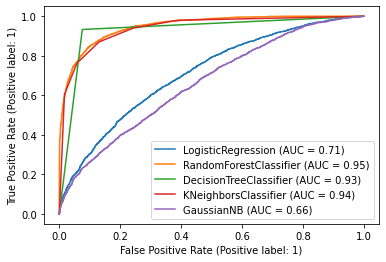

In [12]:
fig = plot_rocs(dataset, models, preds)

## Neural Network

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

2021-11-17 17:23:36.709226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 17:23:36.709245: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
nn = Sequential([
    layers.Dense(16, activation='relu', input_shape=(14, )),
    layers.Dense(32, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
nn.fit(dataset[0], dataset[2], epochs=20, validation_data=(dataset[1], dataset[3]))
loss, nn_acc = nn.evaluate(dataset[1], dataset[3])

2021-11-17 17:23:37.739245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 17:23:37.739884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 17:23:37.739949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-17 17:23:37.740007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-17 17:23:37.740064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/20
881/881 [==============================] - 2s 2ms/step - loss: 0.6914 - accuracy: 0.5336 - val_loss: 0.6894 - val_accuracy: 0.5349
Epoch 2/20
881/881 [==============================] - 3s 4ms/step - loss: 0.6876 - accuracy: 0.5488 - val_loss: 0.6832 - val_accuracy: 0.5669
Epoch 3/20
881/881 [==============================] - 4s 4ms/step - loss: 0.6819 - accuracy: 0.5659 - val_loss: 0.6739 - val_accuracy: 0.5807
Epoch 4/20
881/881 [==============================] - 4s 5ms/step - loss: 0.6697 - accuracy: 0.5909 - val_loss: 0.6526 - val_accuracy: 0.6153
Epoch 5/20
881/881 [==============================] - 3s 4ms/step - loss: 0.6529 - accuracy: 0.6073 - val_loss: 0.6426 - val_accuracy: 0.6230
Epoch 6/20
881/881 [==============================] - 2s 2ms/step - loss: 0.6368 - accuracy: 0.6309 - val_loss: 0.6392 - val_accuracy: 0.6213
Epoch 7/20
881/881 [==============================] - 3s 3ms/step - loss: 0.6291 - accuracy: 0.6385 - val_loss: 0.6326 - val_accuracy: 0.6365
Epoch 

In [15]:
loss, nn_acc

(0.6097514629364014, 0.6589037179946899)

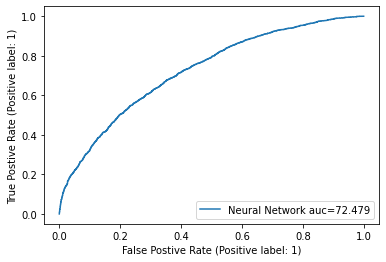

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.figure()
pr = nn.predict(dataset[1])
fpr, tpr, _ = roc_curve(dataset[3], pr)
auc = roc_auc_score(dataset[3], pr)
plt.plot(fpr,tpr, label='Neural Network auc=%.3f' % (100*auc))
plt.xlabel('False Postive Rate (Positive label: 1)')
plt.ylabel('True Postive Rate (Positive label: 1)')
plt.legend(loc='lower right')

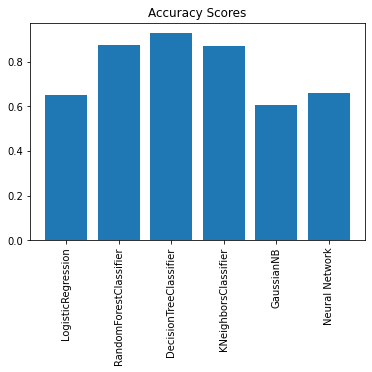

In [17]:
acc = [model.score(dataset[1], dataset[3]) for model in models]
plot_bar('Accuracy Scores', models, acc, ['Neural Network'], nn_acc)

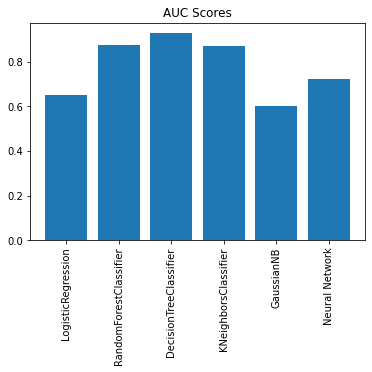

In [18]:
nn_auc = roc_auc_score(dataset[3], nn.predict(dataset[1]))
auc = [roc_auc_score(dataset[3], model.predict(dataset[1])) for model in models]
plot_bar('AUC Scores', models, auc, ['Neural Network'], nn_auc)

In [19]:
hv_preds = hard_voting(get_preds(dataset, models))
hv_acc = accuracy_score(hv_preds, dataset[3])
hv_acc

0.8791536495313831

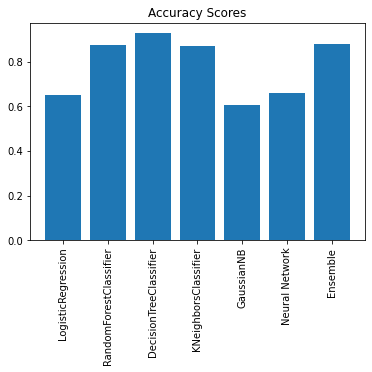

In [20]:
plot_bar('Accuracy Scores', models, acc, ['Neural Network', 'Ensemble'], [nn_acc, hv_acc])

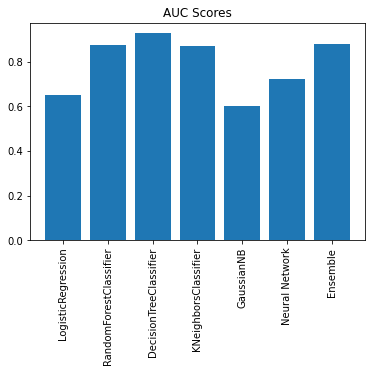

In [21]:
hv_auc = roc_auc_score(dataset[3], hv_preds)
auc = [roc_auc_score(dataset[3], model.predict(dataset[1])) for model in models]
plot_bar('AUC Scores', models, auc, ['Neural Network', 'Ensemble'], [nn_auc, hv_auc])

### Test Data

In [22]:
test_data = pd.read_csv('test_2013_2015.csv')
test_data

,surface,draw-size,tourney_level,player0_id,player0_name,player0_hand,player0_ht,player0_ioc,player0_age,player0_rank,...,player1_hand,player1_ht,player1_ioc,player1_age,player1_rank,player1_rank_points,best_of,round,minutes,winner
0,0,1,0,104919,Leonardo Mayer,1,0.555556,1,0.360270,0.072233,...,0,0.888889,22,0.365854,0.080378,0.049485,0,4,0.268456,0
3,0,1,0,105064,Thomaz Bellucci,0,0.555556,6,0.322581,0.106942,...,1,0.555556,15,0.610597,0.083924,0.047352,0,4,0.560403,1
4,0,1,0,104898,Robin Haase,1,0.600000,30,0.366689,0.062852,...,1,0.555556,22,0.182002,0.112293,0.038891,0,4,0.355705,0
5,0,1,0,104978,Daniel Brands,1,0.733333,20,0.349901,0.047842,...,1,0.444444,1,0.630950,0.049645,0.063989,0,4,0.379195,0
6,0,1,0,103656,Albert Montanes,1,0.266667,15,0.748848,0.041276,...,1,0.333333,38,0.509504,0.107565,0.040313,0,4,0.224832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,0,6,2,105453,Kei Nishikori,1,0.333333,28,0.311883,0.003752,...,1,0.555556,18,0.607569,0.016548,0.143974,1,1,0.741611,1
2611,0,6,2,103819,Roger Federer,1,0.488889,43,0.816327,0.000938,...,1,0.444444,38,0.610934,0.009456,0.271952,1,1,0.419463,1
2612,0,6,2,104925,Novak Djokovic,1,0.555556,37,0.468565,0.000000,...,1,0.600000,23,0.480067,0.002364,0.499111,1,7,0.822148,0
2613,0,6,2,104527,Stanislas Wawrinka,1,0.444444,38,0.597762,0.007505,...,1,0.555556,22,0.607569,0.016548,0.143974,1,7,0.744966,0


In [30]:
test_ds = make_ds(test_data, 0)
test_ds[0].shape

(0,)

In [42]:
accuracy_score(models[2].predict(test_ds[1]), test_ds[3])

0.49855907780979825

In [52]:
nn_loss, nn_acc = nn.evaluate(test_ds[1], test_ds[3])
nn_acc

163/163 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.6763


0.6762728095054626

In [34]:
test_ds

[array([], dtype=float64),
 array([[0.        , 1.        , 0.        , ..., 0.36585366, 0.04948454,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.61059714, 0.04735158,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.18200168, 0.03889086,
         0.        ],
        ...,
        [0.        , 6.        , 2.        , ..., 0.48006728, 0.49911127,
         1.        ],
        [0.        , 6.        , 2.        , ..., 0.60756939, 0.1439744 ,
         1.        ],
        [0.        , 6.        , 2.        , ..., 0.61093356, 0.27195165,
         1.        ]]),
 array([], dtype=float64),
 array([0, 1, 0, ..., 0, 0, 1])]

In [48]:
nn_preds = nn.predict(test_ds[1]).round().reshape(5205, )
nn_preds.shape

(5205,)

In [49]:
preds = get_preds(test_ds, models)
preds[0].shape

(5205,)

In [54]:
pred_ens = hard_voting(preds+[nn_preds])
ens_acc = accuracy_score(test_ds[3], pred_ens)
ens_acc

0.6622478386167147

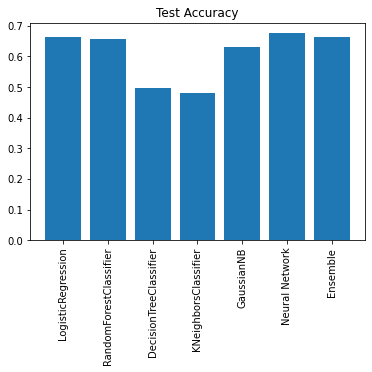

In [55]:
test_acc = [model.score(test_ds[1], test_ds[3]) for model in models]
plot_bar('Test Accuracy', models, test_acc, ['Neural Network', 'Ensemble'], [nn_acc, ens_acc])

In [59]:
test_auc = [roc_auc_score(preds[i], test_ds[3]) for i in range(len(models))]
test_auc

[0.6650821574555211,
 0.6562106161150325,
 0.49852721311514137,
 0.4806179061832654,
 0.6327153751245054]

In [60]:
nn_auc = roc_auc_score(nn_preds, test_ds[3])
nn_auc

0.6767669378859275

In [62]:
ens_auc = roc_auc_score(pred_ens, test_ds[3])
ens_auc

0.666972262661865

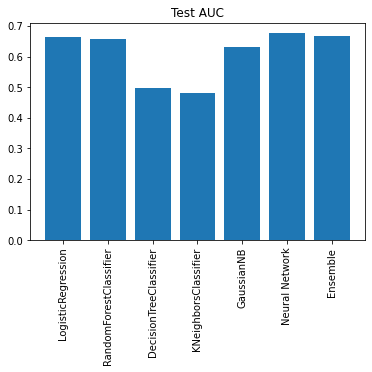

In [64]:
plot_bar('Test AUC', models, test_auc, ['Neural Network', 'Ensemble'], [nn_auc, ens_auc])

In [66]:
test_acc+[nn_acc]

[0.6651296829971182,
 0.6562920268972142,
 0.49855907780979825,
 0.4803073967339097,
 0.6309317963496638,
 0.6762728095054626]

In [67]:
test_auc+[nn_auc]

[0.6650821574555211,
 0.6562106161150325,
 0.49852721311514137,
 0.4806179061832654,
 0.6327153751245054,
 0.6767669378859275]